In [1]:
import os 
import pandas as pd
import numpy as np 
import rdkit
from rdkit import Chem #This gives us most of RDkits's functionality
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
IPythonConsole.ipython_useSVG=True  #SVG's tend to look nicer than the png counterparts
print(rdkit.__version__)

# Mute all errors except critical
Chem.WrapLogs()
lg = rdkit.RDLogger.logger() 
lg.setLevel(rdkit.RDLogger.CRITICAL)

2021.09.2


In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# High DPI rendering for mac
%config InlineBackend.figure_format = 'retina'

# Plot matplotlib plots with white background: 
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

plot_params = {
'font.size' : 15,
'axes.titlesize' : 15,
'axes.labelsize' : 15,
'axes.labelweight' : 'bold',
'xtick.labelsize' : 12,
'ytick.labelsize' : 12,
}
 
plt.rcParams.update(plot_params)

# Reading dataset of molecules from a csv file

Here we will use Pandas, RDkit to make molecule object for the small sample of molecules.



In [4]:
sample_df = pd.read_csv('sample_molecules.csv', sep=',')
sample_df.head(5)

,Name,SMILE
0,Cyclopropane,C1CC1
1,Ethylene,C=C
2,Methane,C
3,t-Butanol,CC(C)(C)O
4,ethane,CC


In [5]:
sample_df.shape

(115, 2)

PandasTools module helps add mol molecule objects from RDKit as per the SMILES in the dataframe

Check the new ROMol columns being appended in the dataframe



In [13]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(sample_df, smilesCol='SMILE')
sample_df.columns

Index(['Name', 'SMILE', 'ROMol'], dtype='object')

,Name,SMILE,ROMol
0,Cyclopropane,C1CC1,
1,Ethylene,C=C,
2,Methane,C,

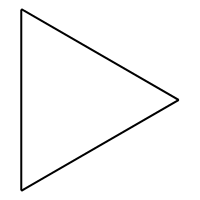
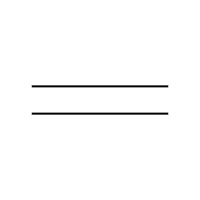
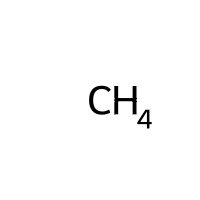

In [14]:
sample_df.head(3)


Visualize the dataframe, add properties of interest at the bottom, you can add index too if need



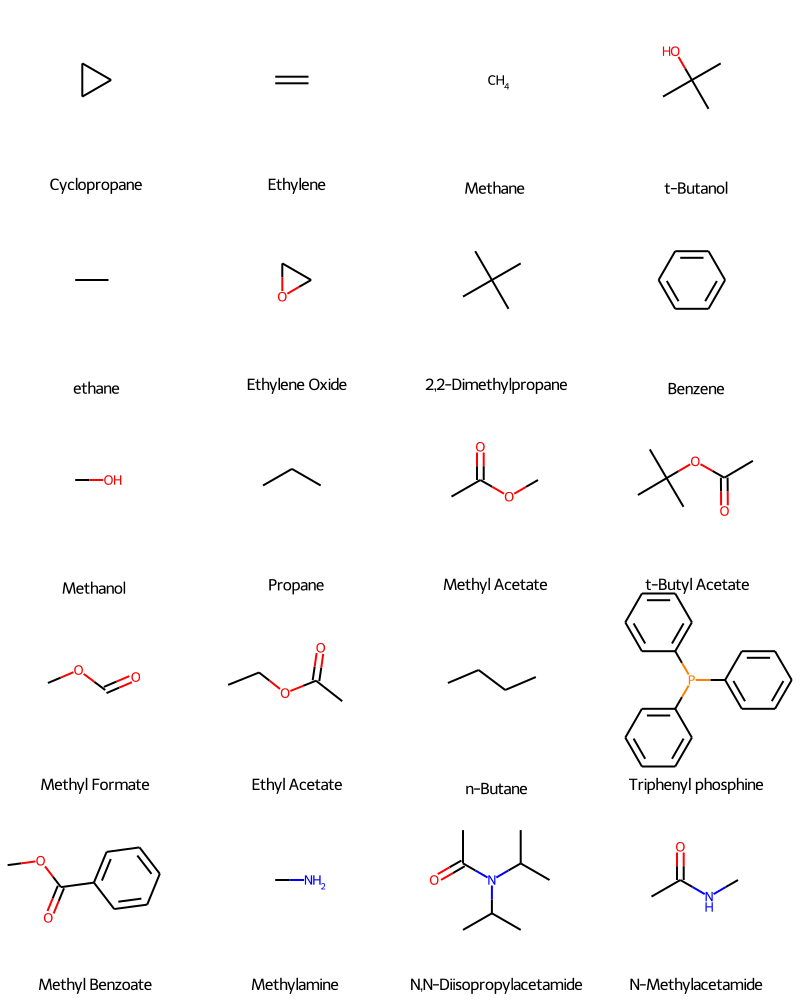

In [15]:
PandasTools.FrameToGridImage(sample_df[:20], legendsCol='Name', molsPerRow=4)


# LogP Dataset

(From Wikipedia) The partition coefficient, abbreviated P, is defined as the ratio of the concentrations of a solute between two immisible solvents at equilibrium. Most commonly, one of the solvents is water, while the second is hydrophobic, such as 1-octanol.

\log P_\text{oct/wat} = \log\left(\frac{\big[\text{solute}\big]_\text{octanol}^\text{un-ionized}}{\big[\text{solute}\big]_\text{water}^\text{un-ionized}}\right)
logP 
oct/wat
​
 =log( 
[solute] 
water
un-ionized
​
 
[solute] 
octanol
un-ionized
​
 
​
 )

Hence the partition coefficient measures how hydrophilic ("water-loving") or hydrophobic ("water-fearing") a chemical substance is. Partition coefficients are useful in estimating the distribution of drugs within the body. Hydrophobic drugs with high octanol-water partition coefficients are mainly distributed to hydrophobic areas such as lipid bilayers of cells. Conversely, hydrophilic drugs (low octanol/water partition coefficients) are found primarily in aqueous regions such as blood serum.

The dataset used in this notebook is obtained from Kaggle. This dataset features relatively simple molecules along with their LogP value. This is a synthetic dataset created using XLogP and does not contain experimental validation

In [18]:
logP_df = pd.read_csv('logP_dataset.csv', sep=',', header=None, names=['SMILES', 'LogP'])
logP_df.head(5)


,SMILES,LogP
0,C[C@H]([C@@H](C)Cl)Cl,2.3
1,C(C=CBr)N,0.3
2,CCC(CO)Br,1.3
3,[13CH3][13CH2][13CH2][13CH2][13CH2][13CH2]O,2.0
4,CCCOCCP,0.6


In [19]:
logP_df.shape


(14610, 2)

# Visualize the SMILE string

In [20]:
mol_temp = logP_df.iloc[420]


In [21]:
mol_temp


SMILES    [2H][C]([2H])[Cl+]Cl
LogP                       1.6
Name: 420, dtype: object

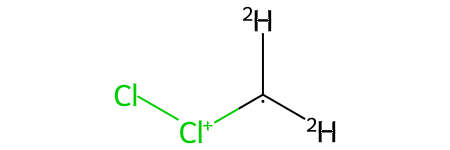

In [22]:
mol_obj = Chem.MolFromSmiles(mol_temp['SMILES'])
mol_obj

In [23]:
print(Chem.MolToMolBlock(mol_obj))



     RDKit          2D

  5  4  0  0  0  0  0  0  0  0999 V2000
    1.2990    0.7500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  3  0  0  0  0  0  0
   -1.2990    0.7500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.5000    0.0000 Cl  0  0  0  0  0  2  0  0  0  0  0  0
   -1.2990   -2.2500    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  2  4  1  0
  4  5  1  0
M  CHG  1   4   1
M  RAD  1   2   2
M  ISO  2   1   2   3   2
M  END



Take a small sample from QM9 dataset



In [25]:
logP_df_smol = logP_df.sample(20).reset_index(drop=True)
logP_df_smol.head(2)


,SMILES,LogP
0,CCCCCOCO,1.3
1,C(CCl)C(O)O,0.0


In [26]:
logP_df_smol.shape


(20, 2)

,SMILES,LogP,ROMol
0,CCCCCOCO,1.3,
1,C(CCl)C(O)O,0.0,
2,[2H]C([2H])(C([2H])([2H])Br)O,0.2,

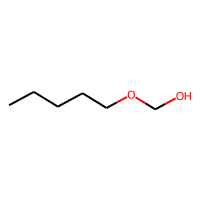
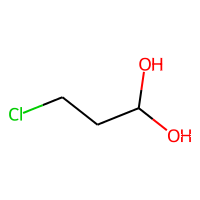
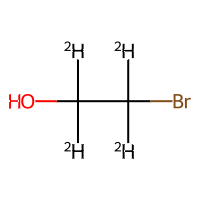

In [28]:
PandasTools.AddMoleculeColumnToFrame(logP_df_smol, smilesCol='SMILES')
logP_df_smol.columns
logP_df_smol.head(3)

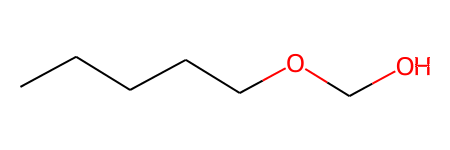

In [29]:
logP_df_smol['ROMol'][0]


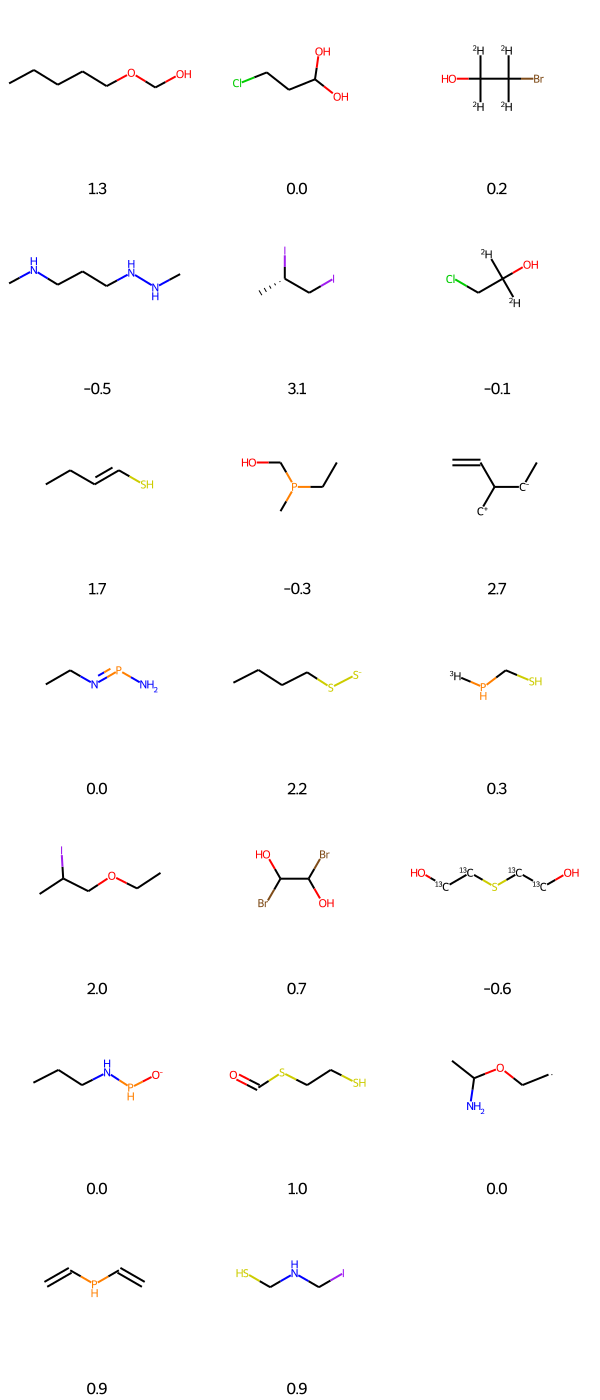

In [31]:
# Visualize the dataframe, add properties of interest at the bottom, you can add index too if need



PandasTools.FrameToGridImage(logP_df_smol, legendsCol='LogP', molsPerRow=3, subImgSize=(200,200))


 # Vanilla linear regression
 Let's try building a model to predict a molecule's logP value given other descriptors. We will try simple molecular descriptors and check the performance. Some molecule discriptors we will consider:

Molecular weight

Number of rotatable bonds

Number of aromatic compounds

In [35]:
from rdkit.Chem import Descriptors
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

In [37]:
mol = Chem.MolFromSmiles("c1ccccc1")

As before we will first convert the SMILES string into a rdkit.Chem.rdchem.Mol object, let's write a convenience function to do so

In [38]:
_count = 0
for i in range(mol.GetNumAtoms()):
    if mol.GetAtomWithIdx(i).GetIsAromatic():
        _count = _count + 1
print(_count)

6


In [39]:
def generate_variables(smiles_list):
    
    variable_array = {'SMILES':[], 'ROMol':[], 'Mol_Wt':[],'Num_Aromatic_rings':[], 'Num_rotate_bonds':[], 'Ratio_Aromatic':[], 'Valence_electrons':[]} 
    
    for smile_entry in smiles_list: 
        mol_object = Chem.MolFromSmiles(smile_entry)
        
        mol_wt = Descriptors.MolWt(mol_object)
        mol_aromatic_rings = Descriptors.NumAromaticRings(mol_object)
        mol_rotatable_bonds = Descriptors.NumRotatableBonds(mol_object)
        
        # Calculate % of aromatic atoms in the compd
        mol_num_heavy_atom = Descriptors.HeavyAtomCount(mol_object)
        
        _count_aromatic = 0 
        for i in range(mol_object.GetNumAtoms()):
            if mol_object.GetAtomWithIdx(i).GetIsAromatic() == True:
                _count_aromatic = _count_aromatic + 1 
        
        mol_aromatic_ratio = _count_aromatic / mol_num_heavy_atom
        
        mol_val_electrons = Descriptors.NumValenceElectrons(mol_object)
        
        variable_array['SMILES'].append(smile_entry)
        variable_array['ROMol'].append(mol_object)
        variable_array['Mol_Wt'].append(mol_wt)
        variable_array['Num_Aromatic_rings'].append(mol_aromatic_rings)
        variable_array['Num_rotate_bonds'].append(mol_rotatable_bonds)
        variable_array['Ratio_Aromatic'].append(mol_aromatic_ratio)
        variable_array['Valence_electrons'].append(mol_val_electrons)
        
    return variable_array

# Look at a subset from the total logP data

,SMILES,LogP,ROMol,Mol_Wt,Num_Aromatic_rings,Num_rotate_bonds,Ratio_Aromatic,Valence_electrons
0,CNCSC,0.5,,91.179,0,2,0.0,32
1,CNCSC=C,1.0,,103.190,0,3,0.0,36

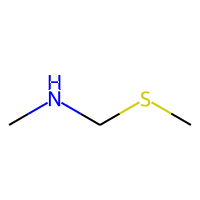
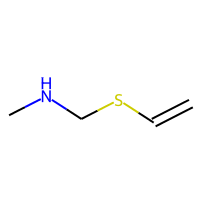

In [43]:
df_5k = logP_df.sample(5000, random_state=42)
variable_dict = generate_variables(df_5k.SMILES)
variable_df = pd.DataFrame(variable_dict, columns=variable_dict.keys())
df_var_5k = df_5k.merge(variable_df, on='SMILES')
df_var_5k.head(2)

# Setup model

In [44]:
df_var_5k.columns

Index(['SMILES', 'LogP', 'ROMol', 'Mol_Wt', 'Num_Aromatic_rings',
       'Num_rotate_bonds', 'Ratio_Aromatic', 'Valence_electrons'],
      dtype='object')

/node/scratch/89268229.1.all.normal.q/ipykernel_28487/1477389164.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_var_5k.hist(ax = ax);


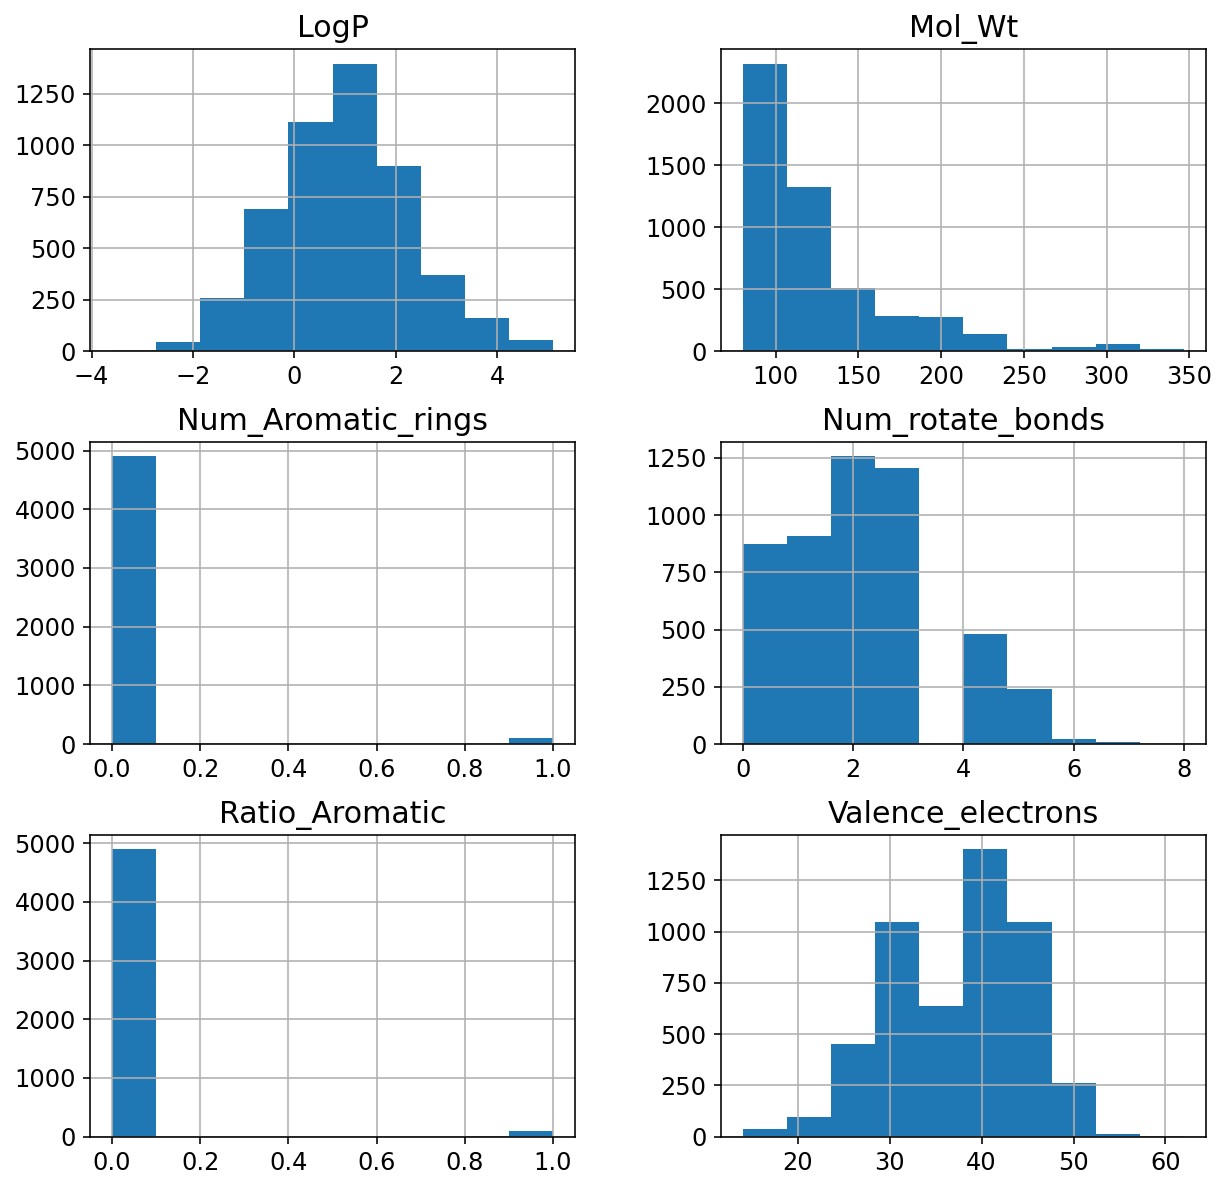

In [45]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
df_var_5k.hist(ax = ax);

In [47]:
# split to train and test

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_var_5k, test_size=0.3, random_state=42)
print(df_train.shape, df_test.shape)


(3500, 8) (1500, 8)


In [48]:
# drop the columns that are not useful
X_train = df_train.drop(columns = ['LogP','ROMol','SMILES', 'Ratio_Aromatic', 'Num_Aromatic_rings']).values
y_train = df_train.LogP.values

In [50]:
# Pre-process input data to normalize the scale of the descriptors

std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_std, y_train)

LinearRegression()

In [51]:
y_pred = model.predict(X_train_std)

Text(0, 0.5, 'Predicted')

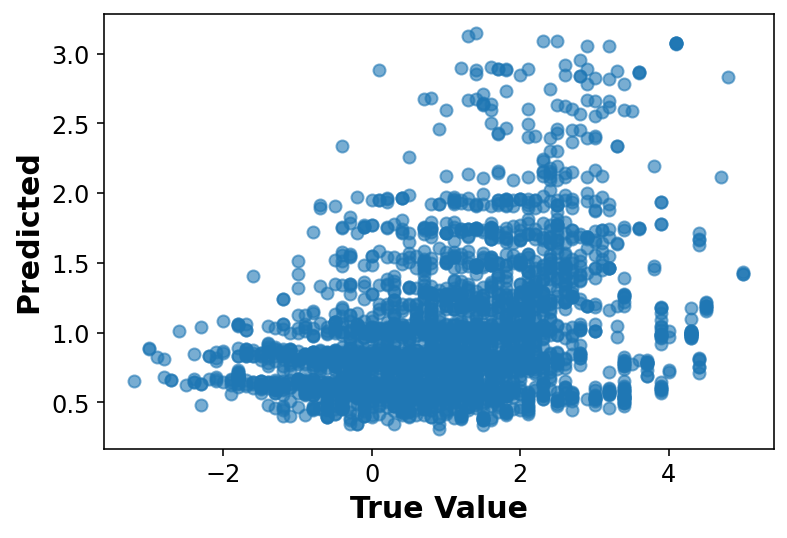

In [52]:
plt.scatter(y_train, y_pred, alpha=0.6)
plt.xlabel('True Value')
plt.ylabel('Predicted')

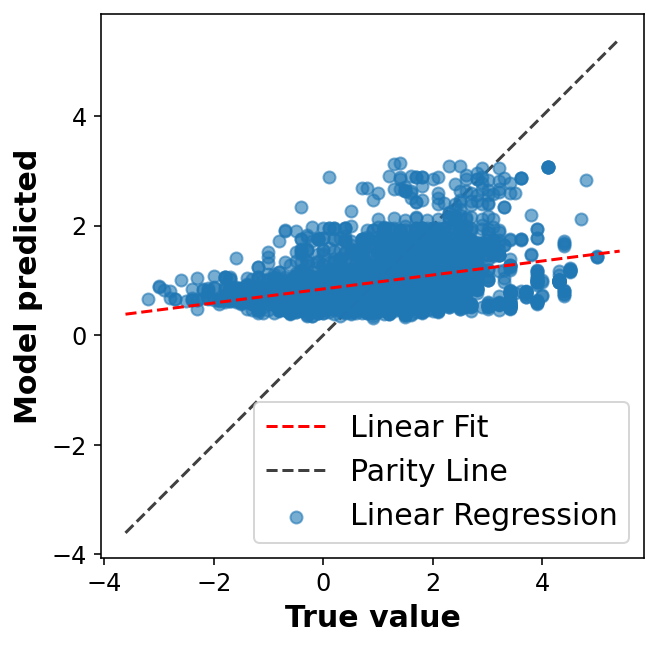

In [53]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(y_train, y_pred, alpha=0.6, label='Linear Regression')

lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
        ]
# Linear fit
reg = np.polyfit(y_train, y_pred, deg=1)
ax.plot(lims, reg[0] * np.array(lims) + reg[1], 'r--', linewidth=1.5, label='Linear Fit')
ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0, label='Parity Line')
ax.set_aspect('equal')
        
ax.set_xlabel('True value')
ax.set_ylabel('Model predicted')
ax.legend(loc='best');

Evaluate model success
One of the simplest ways we can evaluate the success of a linear model is using the coefficient of determination (R2) which compares the variation in y alone to the variation remaining after we fit a model. Another way of thinking about it is comparing our fit line with the model that just predicts the mean of y for any value of x.

Another common practice is to look at a plot of the residuals to evaluate our ansatz that the errors were normally distributed.

In practice, now that we have seen some results, we should move on to try and improve the model. We won't do that here, but know that your work isn't done after your first model (especially one as cruddy as this one). It's only just begun!

Calculate R2 using:
R^2 =1 - \frac{\sum (y_i - \hat{y})^2}{\sum (y_i - \bar{y})^2}
R 
2
 =1− 
∑(y 
i
​
 − 
y
ˉ
​
 ) 
2
 
∑(y 
i
​
 − 
y
^
​
 ) 
2
 
​
 



In [54]:
SS_residuals = np.sum( (y_train - y_pred)**2 ) 
SS_total = np.sum( (y_train - np.mean(y_train))**2 )
r2 = 1 - SS_residuals / SS_total
print(r2)

0.12764393851965716


In [55]:
from sklearn.metrics import r2_score
print('R2 score: {}'.format(r2_score(y_train, y_pred)))

R2 score: 0.12764393851965716


# Using ensemble-based model

In [56]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_train_std)

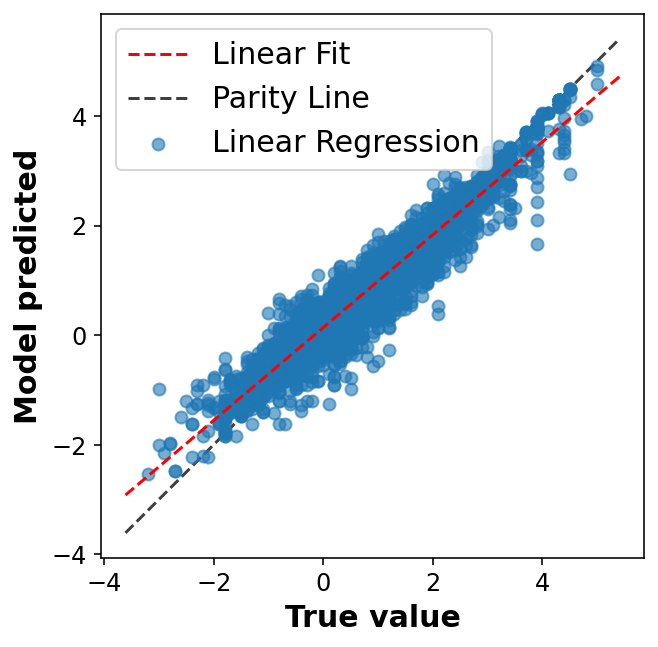

In [57]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(y_train, y_pred, alpha=0.6, label='Linear Regression')

lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
        ]
# Linear fit
reg = np.polyfit(y_train, y_pred, deg=1)
ax.plot(lims, reg[0] * np.array(lims) + reg[1], 'r--', linewidth=1.5, label='Linear Fit')
ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0, label='Parity Line')
ax.set_aspect('equal')
        
ax.set_xlabel('True value')
ax.set_ylabel('Model predicted')
ax.legend(loc='best');

In [58]:
def display_performance(y_true, y_pred):
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print('R2: {0:0.2f}\n'
          'MAE: {1:0.2f}\n'
          'RMSE: {2:0.2f}'.format(r2, mae, rmse))
    return(r2, mae, rmse)

In [59]:
display_performance(y_train,y_pred);

R2: 0.91
MAE: 0.29
RMSE: 0.39


# Fingerprints
Compress molecules into vectors for mathetical operations and comparisons. First we will look at MorganFingerprint method. For this method we have to define the radius and the size of the vector being used.

More information on different Circular Fingerprints can be read at this blogpost. Highly recommended

Presentation by Gregory Landrum (creator of RDkit) on Fingerprints

RDkit Blog entry of visualizing the fingerprint bitvectors. Using the new fingerprint bit rendering code

In [60]:
from rdkit.Chem import AllChem
radius = 2 # How far from the center node should we look at? 
ecfp_power = 10 # Size of the fingerprint vectors  
ECFP = [ np.array(AllChem.GetMorganFingerprintAsBitVect(m, radius, nBits = 2**ecfp_power)) for m in df_train['ROMol'] ]

In [61]:
len(ECFP)


3500

,SMILES,LogP,ROMol,Mol_Wt,Num_Aromatic_rings,Num_rotate_bonds,Ratio_Aromatic,Valence_electrons,ECFP
570,C(CBr)C(F)Br,2.6,,219.879,0,2,0.0,38,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
851,CS(O)(O)Cl,0.7,,116.569,0,0,0.0,34,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

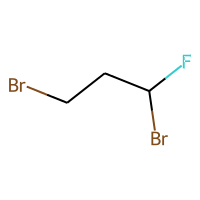
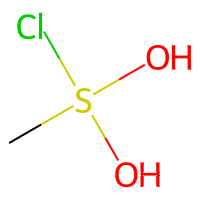

In [63]:
df_train['ECFP'] = ECFP
df_train.sample(2)


In [64]:
X_train = df_train.ECFP.values
X_train = np.stack(X_train, axis=0)

y_train = df_train.LogP.values

In [65]:
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)

In [66]:
model = RandomForestRegressor()
model.fit(X_train_std, y_train)

RandomForestRegressor()

In [67]:
y_pred = model.predict(X_train_std)

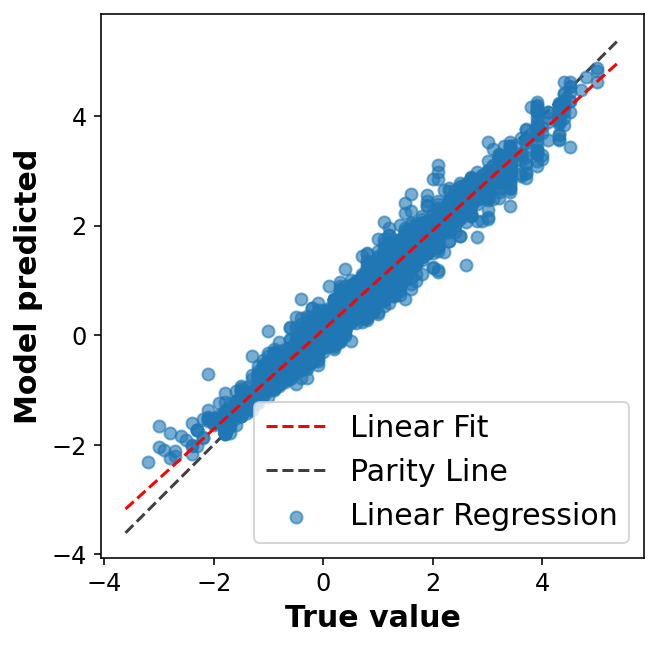

In [68]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(y_train, y_pred, alpha=0.6, label='Linear Regression')

lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
        ]
# Linear fit
reg = np.polyfit(y_train, y_pred, deg=1)
ax.plot(lims, reg[0] * np.array(lims) + reg[1], 'r--', linewidth=1.5, label='Linear Fit')
ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0, label='Parity Line')
ax.set_aspect('equal')
        
ax.set_xlabel('True value')
ax.set_ylabel('Model predicted')
ax.legend(loc='best');

In [69]:
display_performance(y_train,y_pred);

R2: 0.96
MAE: 0.17
RMSE: 0.24


# Similarity

RDKit provides tools for different kinds of similarity search, including Tanimoto, Dice, Cosine, Sokal, Russel… and more. Tanimoto is a very widely use similarity search metric because it incorporates substructure matching. Here is an example

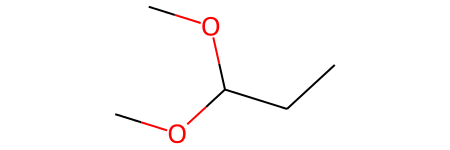

In [70]:
ref_mol = df_var_5k.iloc[4234]['ROMol']
ref_mol

In [72]:
ref_ECFP4_fps = AllChem.GetMorganFingerprintAsBitVect(ref_mol, radius=2)
df_var_5k_ECFP4_fps = [AllChem.GetMorganFingerprintAsBitVect(x,2) for x in df_var_5k['ROMol']]


In [73]:
from rdkit import DataStructs
similarity_efcp4 = [DataStructs.FingerprintSimilarity(ref_ECFP4_fps, x) for x in df_var_5k_ECFP4_fps]

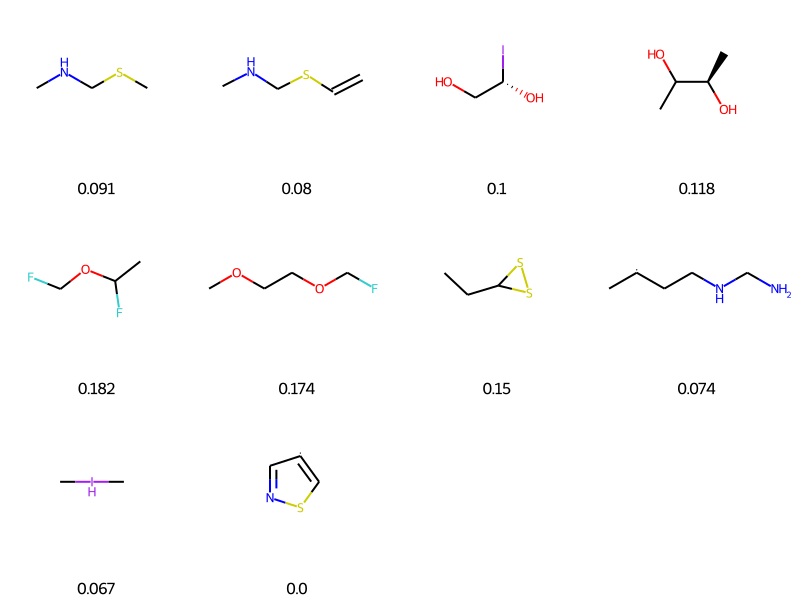

In [74]:
df_var_5k['Tanimoto_Similarity (ECFP4)'] = similarity_efcp4
df_var_5k['Tanimoto_Similarity (ECFP4)'] = df_var_5k['Tanimoto_Similarity (ECFP4)'].round(3)
PandasTools.FrameToGridImage(df_var_5k[:10], legendsCol="Tanimoto_Similarity (ECFP4)", molsPerRow=4)

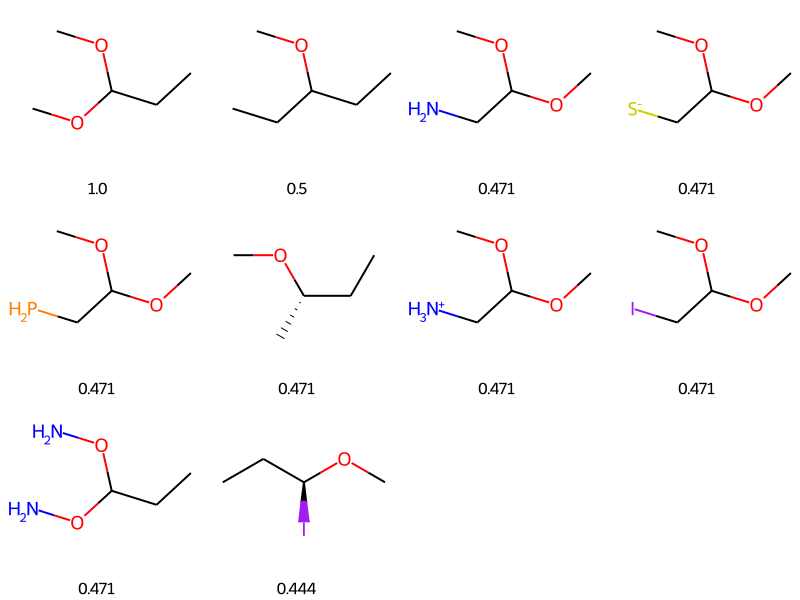

In [75]:
df_var_5k = df_var_5k.sort_values(['Tanimoto_Similarity (ECFP4)'], ascending=False)
PandasTools.FrameToGridImage(df_var_5k[:10], legendsCol="Tanimoto_Similarity (ECFP4)", molsPerRow=4)